# Actividad Sesión 4 - Limpieza de Datos de Sensores
1. Carga y exploración inicial
* Carga el archivo “sensores_industriales.csv” en tu entorno de Python.
* Realiza una exploración básica: cantidad de registros, variables, tipos de datos y presencia de valores
perdidos.


2. Detección de valores perdidos
* Identifica las columnas y filas que contienen valores faltantes.
* Reemplaza los marcadores especiales (como “NA”, “?”, “-999”) por valores nulos reconocidos (NaN).


In [1]:
import pandas as pd
import numpy as np
from google.colab import files
import io

# ===========================================
# 1. CARGA Y EXPLORACIÓN INICIAL
# ===========================================

print("1. CARGA Y EXPLORACIÓN INICIAL")
print("=" * 50)

# Cargar archivo
print("Selecciona tu archivo CSV...")
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))
print(f"Archivo cargado: {filename}")

# Exploración básica
print(f"\nCantidad de registros: {df.shape[0]}")
print(f"Cantidad de variables: {df.shape[1]}")

print(f"\nVariables del dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

print(f"\nTipos de datos:")
print(df.dtypes)

print(f"\nValores perdidos por columna:")
for col in df.columns:
    perdidos = df[col].isnull().sum()
    print(f"  {col}: {perdidos} valores perdidos")

print(f"\nPrimeras 5 filas:")
print(df.head())

# ===========================================
# 2. DETECCIÓN DE VALORES PERDIDOS
# ===========================================

print("\n\n2. DETECCIÓN DE VALORES PERDIDOS")
print("=" * 50)

# 2.1 Identificar valores faltantes
print("\n2.1 Valores faltantes por columna:")
valores_por_columna = df.isnull().sum()
for col in df.columns:
    if valores_por_columna[col] > 0:
        print(f"  {col}: {valores_por_columna[col]} valores faltantes")
    else:
        print(f"  {col}: Sin valores faltantes")

# Filas con valores faltantes
filas_con_faltantes = df[df.isnull().any(axis=1)]
print(f"\nFilas con valores faltantes: {len(filas_con_faltantes)}")

if len(filas_con_faltantes) > 0:
    print(f"Índices de filas con valores faltantes:")
    print(f"  {list(filas_con_faltantes.index)}")

# 2.2 Reemplazar marcadores especiales
print("\n2.2 Reemplazando marcadores especiales...")

# Marcadores a reemplazar (incluyendo numéricos)
marcadores_texto = ['NA', 'N/A', 'na', 'n/a', '?', 'NULL', 'null', '', 'None']
marcadores_numericos = [-999, -1, 999, 9999]

# Crear copia limpia
df_limpio = df.copy()

# Reemplazar marcadores de texto
for col in df_limpio.columns:
    if df_limpio[col].dtype == 'object':
        for marcador in marcadores_texto:
            df_limpio[col] = df_limpio[col].replace(marcador, np.nan)

# Reemplazar marcadores numéricos
for col in df_limpio.columns:
    if df_limpio[col].dtype in ['int64', 'float64']:
        for marcador in marcadores_numericos:
            df_limpio[col] = df_limpio[col].replace(marcador, np.nan)

# Verificar cambios
valores_antes = df.isnull().sum().sum()
valores_despues = df_limpio.isnull().sum().sum()
print(f"Valores NaN antes: {valores_antes}")
print(f"Valores NaN después: {valores_despues}")
print(f"Nuevos valores NaN agregados: {valores_despues - valores_antes}")

# Mostrar detalles de los cambios por columna
print(f"\nDetalles de cambios por columna:")
for col in df.columns:
    antes = df[col].isnull().sum()
    despues = df_limpio[col].isnull().sum()
    if despues > antes:
        print(f"  {col}: {antes} → {despues} (+{despues-antes})")

# Resumen final
print(f"\nRESUMEN FINAL:")
print(f"Dataset original: {df.shape[0]} filas x {df.shape[1]} columnas")
print(f"Valores perdidos totales: {valores_despues}")
print(f"Porcentaje de valores perdidos: {(valores_despues/(df.shape[0]*df.shape[1]))*100:.2f}%")

print(f"\nDataset limpio guardado en variable 'df_limpio'")
print("¡Proceso completado!")

1. CARGA Y EXPLORACIÓN INICIAL
Selecciona tu archivo CSV...


Saving sensores_industriales.csv to sensores_industriales.csv
Archivo cargado: sensores_industriales.csv

Cantidad de registros: 150
Cantidad de variables: 4

Variables del dataset:
  1. id
  2. temperatura
  3. presion
  4. estado

Tipos de datos:
id               int64
temperatura    float64
presion        float64
estado          object
dtype: object

Valores perdidos por columna:
  id: 0 valores perdidos
  temperatura: 8 valores perdidos
  presion: 9 valores perdidos
  estado: 8 valores perdidos

Primeras 5 filas:
   id  temperatura   presion  estado
0   1    60.000000  1.020020      OK
1   2    21.585207  1.023858      OK
2   3    23.943066  0.982799     NaN
3   4    26.569090  1.019290  ALERTA
4   5    21.297540  1.021723   FALLA


2. DETECCIÓN DE VALORES PERDIDOS

2.1 Valores faltantes por columna:
  id: Sin valores faltantes
  temperatura: 8 valores faltantes
  presion: 9 valores faltantes
  estado: 8 valores faltantes

Filas con valores faltantes: 23
Índices de filas con valore

3. Tratamiento de valores perdidos
* Elimina filas con más del 50% de sus valores faltantes.
* Imputa valores faltantes en variables numéricas usando la mediana o KNN, según lo aprendido.
* Imputa valores faltantes en variables categóricas usando la moda o una categoría especial
(“Desconocido”).



In [2]:
#Tratamiento de valores perdidos

print("\n\n3. TRATAMIENTO DE VALORES PERDIDOS")
print("=" * 50)

# Usar el DataFrame limpio
df_tratado = df_limpio.copy()

# 3.1 Elimina filas con más del 50% de sus valores faltantes.
print("\n3.1 Eliminando filas con más del 50% de valores faltantes.")

initial_rows = df_tratado.shape[0]
threshold = 0.5 * df_tratado.shape[1] # 50% del número de columnas
df_tratado = df_tratado.dropna(thresh=df_tratado.shape[1] - threshold) # Mantén solo las filas en df_tratado que tengan un número
#de valores no nulos mayor o igual a la cantidad total de columnas menos el 50% de las columnas

rows_dropped = initial_rows - df_tratado.shape[0]
print(f"Filas eliminadas: {rows_dropped}")
print(f"Dataset después de eliminar filas: {df_tratado.shape[0]} filas x {df_tratado.shape[1]} columnas")

# 3.2 Imputa valores faltantes en variables numéricas
print("\n3.2 Imputando valores faltantes en variables numéricas")

# Identificar columnas numéricas
numeric_cols = df_tratado.select_dtypes(include=np.number).columns
print(f"Columnas numéricas: {list(numeric_cols)}")

# Imputación por mediana (opción simple)
print("  Imputación por mediana")
for col in numeric_cols:
    if df_tratado[col].isnull().sum() > 0:
        median_val = df_tratado[col].median()
        df_tratado[col] = df_tratado[col].fillna(median_val)
        print(f"    Columna '{col}': Imputada con la mediana ({median_val:.2f})")

# Verificar si quedan nulos en numéricas
numeric_nulls_after = df_tratado[numeric_cols].isnull().sum().sum()
print(f"Valores nulos en columnas numéricas después de imputación: {numeric_nulls_after}")

# 3.3 Imputa valores faltantes en variables categóricas
print("\n3.3 Imputando valores faltantes en variables categóricas")

# Identificar columnas categóricas (tipo object o category)
categorical_cols = df_tratado.select_dtypes(include=['object', 'category']).columns
print(f"Columnas categóricas: {list(categorical_cols)}")

# Imputación por categoría especial
for col in categorical_cols:
    if df_tratado[col].isnull().sum() > 0:
        df_tratado[col] = df_tratado[col].fillna('Desconocido')
        print(f"    Columna '{col}': Imputada con 'Desconocido'")

# Verificar si quedan nulos en categóricas
categorical_nulls_after = df_tratado[categorical_cols].isnull().sum().sum()
print(f"Valores nulos en columnas categóricas después de imputación: {categorical_nulls_after}")

# Resumen final de valores perdidos
total_nulls_after_treatment = df_tratado.isnull().sum().sum()

if total_nulls_after_treatment == 0:
    print("\n Los valores perdidos han sido tratados")
else:
    print("\nAún quedan algunos valores perdidos. Revisar columnas específicas.")
    print(df_tratado.isnull().sum()[df_tratado.isnull().sum() > 0])

print(f"\nDataset tratado guardado en variable 'df_tratado'")



3. TRATAMIENTO DE VALORES PERDIDOS

3.1 Eliminando filas con más del 50% de valores faltantes.
Filas eliminadas: 0
Dataset después de eliminar filas: 150 filas x 4 columnas

3.2 Imputando valores faltantes en variables numéricas
Columnas numéricas: ['id', 'temperatura', 'presion']
  Imputación por mediana
    Columna 'temperatura': Imputada con la mediana (21.78)
    Columna 'presion': Imputada con la mediana (1.02)
Valores nulos en columnas numéricas después de imputación: 0

3.3 Imputando valores faltantes en variables categóricas
Columnas categóricas: ['estado']
    Columna 'estado': Imputada con 'Desconocido'
Valores nulos en columnas categóricas después de imputación: 0

 Los valores perdidos han sido tratados

Dataset tratado guardado en variable 'df_tratado'


4. **Detección y tratamiento de outliers**
* Detecta outliers en al menos dos variables numéricas utilizando la regla de 1.5 x IQR.

 *(Regla de 1.5 x IQR (Interquartile Range): Un valor es considerado outlier si está fuera del rango: [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR], donde IQR =
Q3 - Q1.)*

* Elimina los registros identificados como outliers extremos o justifica si decides no eliminarlos.

In [3]:
# Detectar outliers con 1.5 x IQR
# Despliega por pantalla los outliers detectados
def detectar_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
    print(f"Outliers detectados en '{col}': {len(outliers)} registros")
    display(outliers[[col]])
    return outliers

# Detectar outliers en las dos primeras columnas numéricas
outliers_1 = detectar_outliers(numeric_cols[1])
outliers_2 = detectar_outliers(numeric_cols[2])

# Combinar todos los outliers sin duplicar filas
outliers_total = pd.concat([outliers_1, outliers_2]).drop_duplicates()

#Despliega por pantalla los outliers totales a eliminar
print(f"\nTotal de registros a eliminar: {len(outliers_total)}")
display(outliers_total)

# Eliminar los outliers
df_original = df.copy()
df = df.drop(outliers_total.index)

Outliers detectados en 'temperatura': 4 registros


,temperatura
0,60.000000
10,-10.000000
25,-999.000000
113,29.389726


Outliers detectados en 'presion': 4 registros


,presion
5,3.000000
20,0.200000
59,1.164109
112,0.880349



Total de registros a eliminar: 8


,id,temperatura,presion,estado
0,1,60.000000,1.020020,OK
10,11,-10.000000,0.971013,ALERTA
25,26,-999.000000,1.043087,FALLA
113,114,29.389726,0.969024,FALLA
5,6,21.297589,3.000000,OK
20,21,26.396946,0.200000,OK
59,60,24.926635,1.164109,FALLA
112,113,22.180691,0.880349,NaN



5. VISUALIZACIÓN ANTES Y DESPUÉS

Total de registros outliers únicos (calculados en df_limpio):
Outliers detectados en 'temperatura' (en df_limpio): 4 registros


,temperatura
0,60.000000
10,-10.000000
74,14.140765
113,29.389726


Outliers detectados en 'presion' (en df_limpio): 4 registros


,presion
5,3.000000
20,0.200000
59,1.164109
112,0.880349



Total de registros a eliminar (outliers únicos de df_limpio): 8


,id,temperatura,presion,estado
0,1,60.000000,1.020020,OK
10,11,-10.000000,0.971013,ALERTA
74,75,14.140765,0.991123,OK
113,114,29.389726,0.969024,FALLA
5,6,21.297589,3.000000,OK
20,21,26.396946,0.200000,OK
59,60,24.926635,1.164109,FALLA
112,113,22.180691,0.880349,NaN


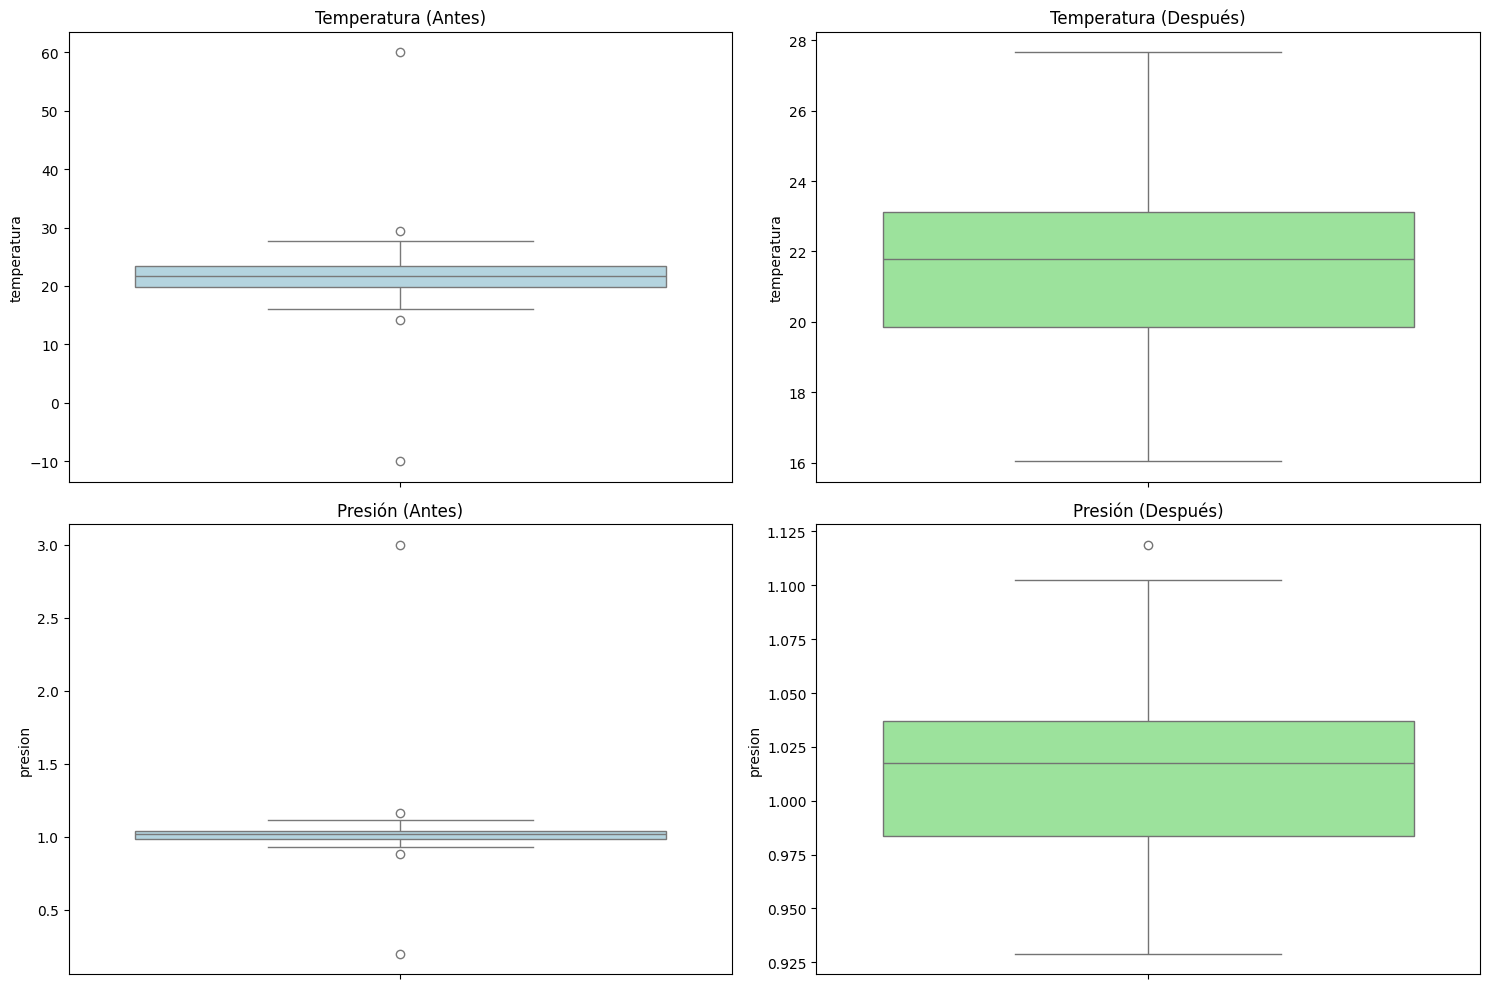

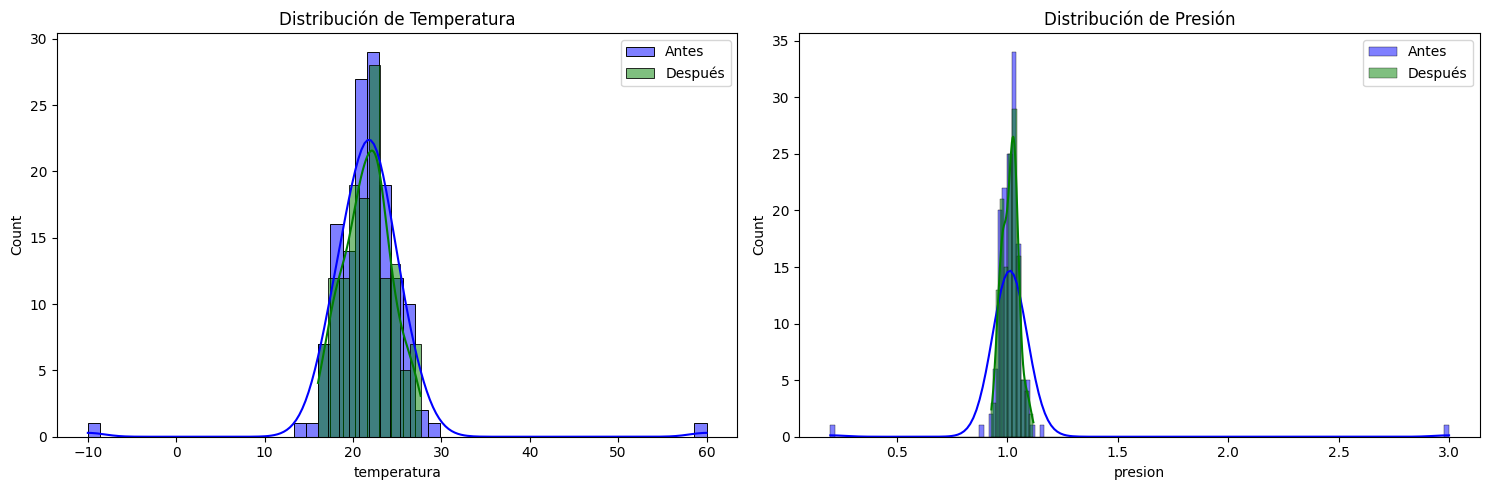


Resumen de cambios:


,Variable,Registros iniciales,Registros finales,Outliers eliminados,Media antes,Media después,Desviación estándar antes,Desviación estándar después
0,temperatura,150,142,4,21.723993,21.614667,5.062500,2.70555
1,presion,150,142,4,1.021449,1.013749,0.185733,0.03751



¡Proceso completado! Dataset sin outliers disponible en 'df_sin_outliers'


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# 5. VISUALIZACIÓN ANTES Y DESPUÉS (ADAPTADA A TU CÓDIGO)
print("\n5. VISUALIZACIÓN ANTES Y DESPUÉS")
print("="*50)

# Usaremos:
# - df_limpio: DataFrame después de tratar valores perdidos (considerado 'Antes' para outliers)
# - df_sin_outliers: DataFrame después de eliminar outliers (lo crearemos)

print(f"\nTotal de registros outliers únicos (calculados en df_limpio):")

# Recalcular outliers based on df_limpio
def detectar_outliers_limpio(col, df):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
    print(f"Outliers detectados en '{col}' (en df_limpio): {len(outliers)} registros")
    display(outliers[[col]])
    return outliers

# Identify numeric columns from df_limpio
numeric_cols_limpio = df_limpio.select_dtypes(include=np.number).columns.tolist()

# Detect outliers in the relevant numeric columns using df_limpio
# Assuming 'id' is not a column for outlier detection
outliers_1_limpio = detectar_outliers_limpio(numeric_cols_limpio[1], df_limpio) # temperature
outliers_2_limpio = detectar_outliers_limpio(numeric_cols_limpio[2], df_limpio) # presion

# Combine all outliers without duplicating rows
outliers_total_limpio = pd.concat([outliers_1_limpio, outliers_2_limpio]).drop_duplicates()

print(f"\nTotal de registros a eliminar (outliers únicos de df_limpio): {len(outliers_total_limpio)}")
display(outliers_total_limpio)


# 3. Crear DataFrame sin outliers
# Check if indices exist before dropping
indices_to_drop = outliers_total_limpio.index
existing_indices = df_limpio.index.intersection(indices_to_drop)

if len(indices_to_drop) != len(existing_indices):
    print(f"Warning: Some indices to drop were not found in df_limpio. Dropping only existing indices.")
    print(f"Indices to drop: {list(indices_to_drop)}")
    print(f"Existing indices in df_limpio: {list(df_limpio.index)}")


df_sin_outliers = df_limpio.drop(existing_indices)


# 4. Visualización comparativa
plt.figure(figsize=(15, 10))

# Boxplot temperatura
plt.subplot(2, 2, 1)
sns.boxplot(data=df_limpio, y='temperatura', color='lightblue')
plt.title('Temperatura (Antes)')

plt.subplot(2, 2, 2)
sns.boxplot(data=df_sin_outliers, y='temperatura', color='lightgreen')
plt.title('Temperatura (Después)')

# Boxplot presión
plt.subplot(2, 2, 3)
sns.boxplot(data=df_limpio, y='presion', color='lightblue')
plt.title('Presión (Antes)')

plt.subplot(2, 2, 4)
sns.boxplot(data=df_sin_outliers, y='presion', color='lightgreen')
plt.title('Presión (Después)')

plt.tight_layout()
plt.show()

# Histogramas comparativos
plt.figure(figsize=(15, 5))

# Histograma temperatura
plt.subplot(1, 2, 1)
sns.histplot(data=df_limpio, x='temperatura', color='blue', alpha=0.5, label='Antes', kde=True)
sns.histplot(data=df_sin_outliers, x='temperatura', color='green', alpha=0.5, label='Después', kde=True)
plt.title('Distribución de Temperatura')
plt.legend()

# Histograma presión
plt.subplot(1, 2, 2)
sns.histplot(data=df_limpio, x='presion', color='blue', alpha=0.5, label='Antes', kde=True)
sns.histplot(data=df_sin_outliers, x='presion', color='green', alpha=0.5, label='Después', kde=True)
plt.title('Distribución de Presión')
plt.legend()

plt.tight_layout()
plt.show()

# Tabla resumen de cambios
print("\nResumen de cambios:")
resumen = pd.DataFrame({
    'Variable': ['temperatura', 'presion'],
    'Registros iniciales': [len(df_limpio), len(df_limpio)],
    'Registros finales': [len(df_sin_outliers), len(df_sin_outliers)],
    'Outliers eliminados': [len(outliers_1_limpio), len(outliers_2_limpio)],
    'Media antes': [df_limpio['temperatura'].mean(), df_limpio['presion'].mean()],
    'Media después': [df_sin_outliers['temperatura'].mean(), df_sin_outliers['presion'].mean()],
    'Desviación estándar antes': [df_limpio['temperatura'].std(), df_limpio['presion'].std()],
    'Desviación estándar después': [df_sin_outliers['temperatura'].std(), df_sin_outliers['presion'].std()]
})

display(resumen)

print("\n¡Proceso completado! Dataset sin outliers disponible en 'df_sin_outliers'")

6.1 Explica brevemente cada paso realizado y la justificación de las técnicas elegidas
1. Carga y exploración inicial
Carga: Se sube el archivo CSV usando files.upload() para trabajar con los datos en Colab.
Exploración: Se muestran cantidad de registros, variables, tipos de datos y valores perdidos para conocer la estructura y calidad del dataset.
2. Detección de valores perdidos
Identificación: Se detectan columnas y filas con valores faltantes usando funciones de pandas.
Reemplazo: Se sustituyen marcadores especiales como “NA”, “?”, “-999” por NaN para unificar los valores perdidos y facilitar su manejo posterior.
3.Para los números que faltaban, usamos la mediana porque no se ve afectada por los valores muy altos o muy bajos (outliers), dando un mejor promedio. Para las categorías que faltaban, pusimos "Desconocido" en lugar de adivinar con la más común (moda). Esto nos dice claramente que el dato no estaba y no cambia las proporciones de las categorías que sí teníamos.
4. Para la detección y tratamiento de outliers se aplicó la regla del rango intercuartílico (IQR) para detectar valores atípicos, específicamente fue aplicado en las columnas "temperatura" y "presión". En una función se dejó lo siguiente:
* Se calcularon los cuartiles Q1 (25%) y Q3 (75%).
* Se determinó el rango intercuartílico: IQR = Q3 - Q1.
* Se calcularon los límites aceptables:
 * Límite inferior = Q1 - 1.5 × IQR
 * Límite superior = Q3 + 1.5 × IQR

 Todos los registros cuyos valores estaban fuera de ese rango fueron considerados outliers. A continuación los outliers fueron desplegados en pantalla para su conocimiento y luego eliminados del conjunto de datos
5. Este código compara visual y estadísticamente tu dataset antes y después de eliminar outliers, partiendo del DataFrame limpio (df_limpio). Primero detecta outliers en temperatura y presión usando el método IQR (1.5 veces el rango intercuartílico), mostrando cuántos valores atípicos existen y sus valores específicos. Luego elimina estos outliers de forma segura, verificando que los índices existan en el DataFrame para evitar errores, generando así el nuevo dataset df_sin_outliers. Usando visualizaciones clave - boxplots para comparar rangos y valores extremos, e histogramas con curvas de densidad (KDE) para analizar distribuciones - el código revela cómo cambian los datos tras la limpieza. Finalmente, una tabla resume métricas importantes (registros, medias y desviaciones estándar) antes y después del proceso. Elegimos boxplots e histogramas porque son herramientas clásicas para análisis de distribución de datos, mientras que el método IQR es robusto para identificar outliers en datos no necesariamente normales. La verificación de índices añade robustez al proceso, y la tabla final cuantifica el impacto de la limpieza, dando una visión completa del antes/después tanto gráfica como numéricamente.
6.2

In [5]:
# 6.2 Guardar el nuevo dataset limpio y preprocesado en un archivo CSV.

print("\n\n6. GUARDAR DATASET LIMPIO Y PREPROCESADO")
print("=" * 50)

# Guarda el DataFrame df_sin_outliers (que tiene valores perdidos tratados y outliers eliminados)
output_filename = "sensores_industriales_limpio_procesado.csv"
df_sin_outliers.to_csv(output_filename, index=False)

print(f"Dataset limpio y preprocesado guardado exitosamente como '{output_filename}'")

# Opcional: Descargar el archivo automáticamente
try:
  files.download(output_filename)
  print(f"Archivo '{output_filename}' descargado.")
except Exception as e:
  print(f"No se pudo descargar el archivo automáticamente.")
  print(e)





6. GUARDAR DATASET LIMPIO Y PREPROCESADO
Dataset limpio y preprocesado guardado exitosamente como 'sensores_industriales_limpio_procesado.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Archivo 'sensores_industriales_limpio_procesado.csv' descargado.
